<h1 style="background-color:DodgerBlue;"> Anamoly detection :Statistical Methods- IQR </h1>


## 🧪 **Scenario: Website Traffic (Number of Active Users per Hour)**

Imagine you're monitoring traffic to a website or an online service. Under normal conditions, user counts vary with a fairly consistent range, but sometimes unusual spikes or drops may occur due to marketing events, server issues, or bot traffic.


### 🐍 **1. Simulate Website Traffic Data **

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Simulate normal hourly user count between 100 and 300
np.random.seed(101)
normal_traffic = np.random.normal(loc=200, scale=30, size=150).astype(int)

# Inject a few abnormal user counts (anomalies)
anomalies = np.array([500, 550, 50, 30, 600])  # Suspicious spikes or drops

# Combine data
user_counts = np.concatenate((normal_traffic, anomalies))
timestamps = pd.date_range(start='2023-01-01', periods=len(user_counts), freq='h')


df = pd.DataFrame({'timestamp': timestamps, 'active_users': user_counts})
df.head()

,timestamp,active_users
0,2023-01-01 00:00:00,281
1,2023-01-01 01:00:00,218
2,2023-01-01 02:00:00,227
3,2023-01-01 03:00:00,215
4,2023-01-01 04:00:00,219


### 🔎 **2. Apply IQR Method**

In [6]:
Q1 = df['active_users'].quantile(0.25)
Q3 = df['active_users'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Flag anomalies
df['anomaly'] = (df['active_users'] < lower_bound) | (df['active_users'] > upper_bound)

df.head()

,timestamp,active_users,anomaly
0,2023-01-01 00:00:00,281,False
1,2023-01-01 01:00:00,218,False
2,2023-01-01 02:00:00,227,False
3,2023-01-01 03:00:00,215,False
4,2023-01-01 04:00:00,219,False


In [7]:
# Outliers
df [ df['anomaly'] == True ]

,timestamp,active_users,anomaly
150,2023-01-07 06:00:00,500,True
151,2023-01-07 07:00:00,550,True
152,2023-01-07 08:00:00,50,True
153,2023-01-07 09:00:00,30,True
154,2023-01-07 10:00:00,600,True


### 📊 **3. Visualize the Anomalies**

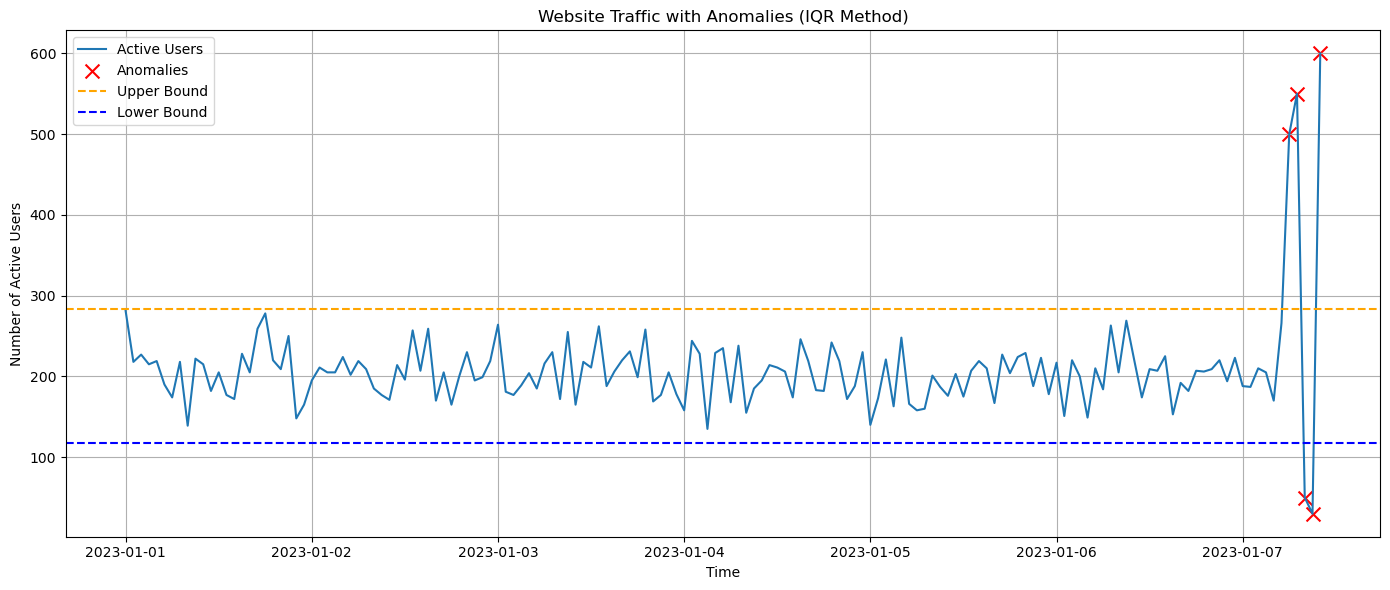

In [4]:
plt.figure(figsize=(14, 6))
plt.plot(df['timestamp'], df['active_users'], label='Active Users')
plt.scatter(df[df['anomaly']]['timestamp'], 
            df[df['anomaly']]['active_users'], 
            color='red', label='Anomalies', marker='x', s=100)

# Plot IQR bounds
plt.axhline(upper_bound, color='orange', linestyle='--', label='Upper Bound')
plt.axhline(lower_bound, color='blue', linestyle='--', label='Lower Bound')

plt.title('Website Traffic with Anomalies (IQR Method)')
plt.xlabel('Time')
plt.ylabel('Number of Active Users')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 🧠 Interpretation

- 📊 **The IQR method** is great when your data isn’t strictly normal — it doesn’t assume any specific distribution.
- 🔴 **Red Xs** = Detected anomalies — these are extreme surges or drops in the number of active users.
- 🟠 **Orange Dashed Line** = Upper IQR threshold — values above this are considered unusually high.
- 🔵 **Blue Dashed Line** = Lower IQR threshold — values below this are considered unusually low.
- ✅ **Normal Range** = The user counts falling between the upper and lower bounds — expected behavior.

